In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../DATA/mushrooms.csv")

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<Axes: xlabel='class', ylabel='count'>

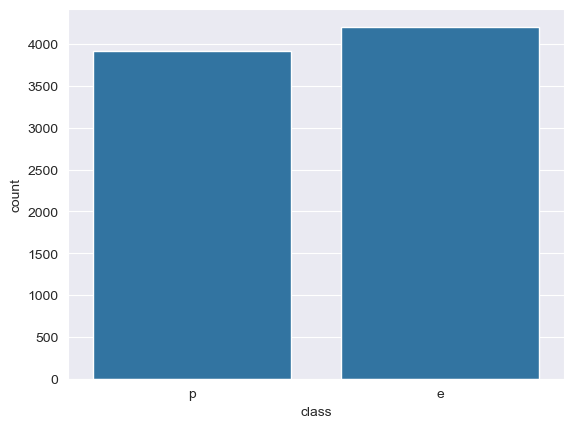

In [4]:
sns.countplot(data=df, x='class')

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


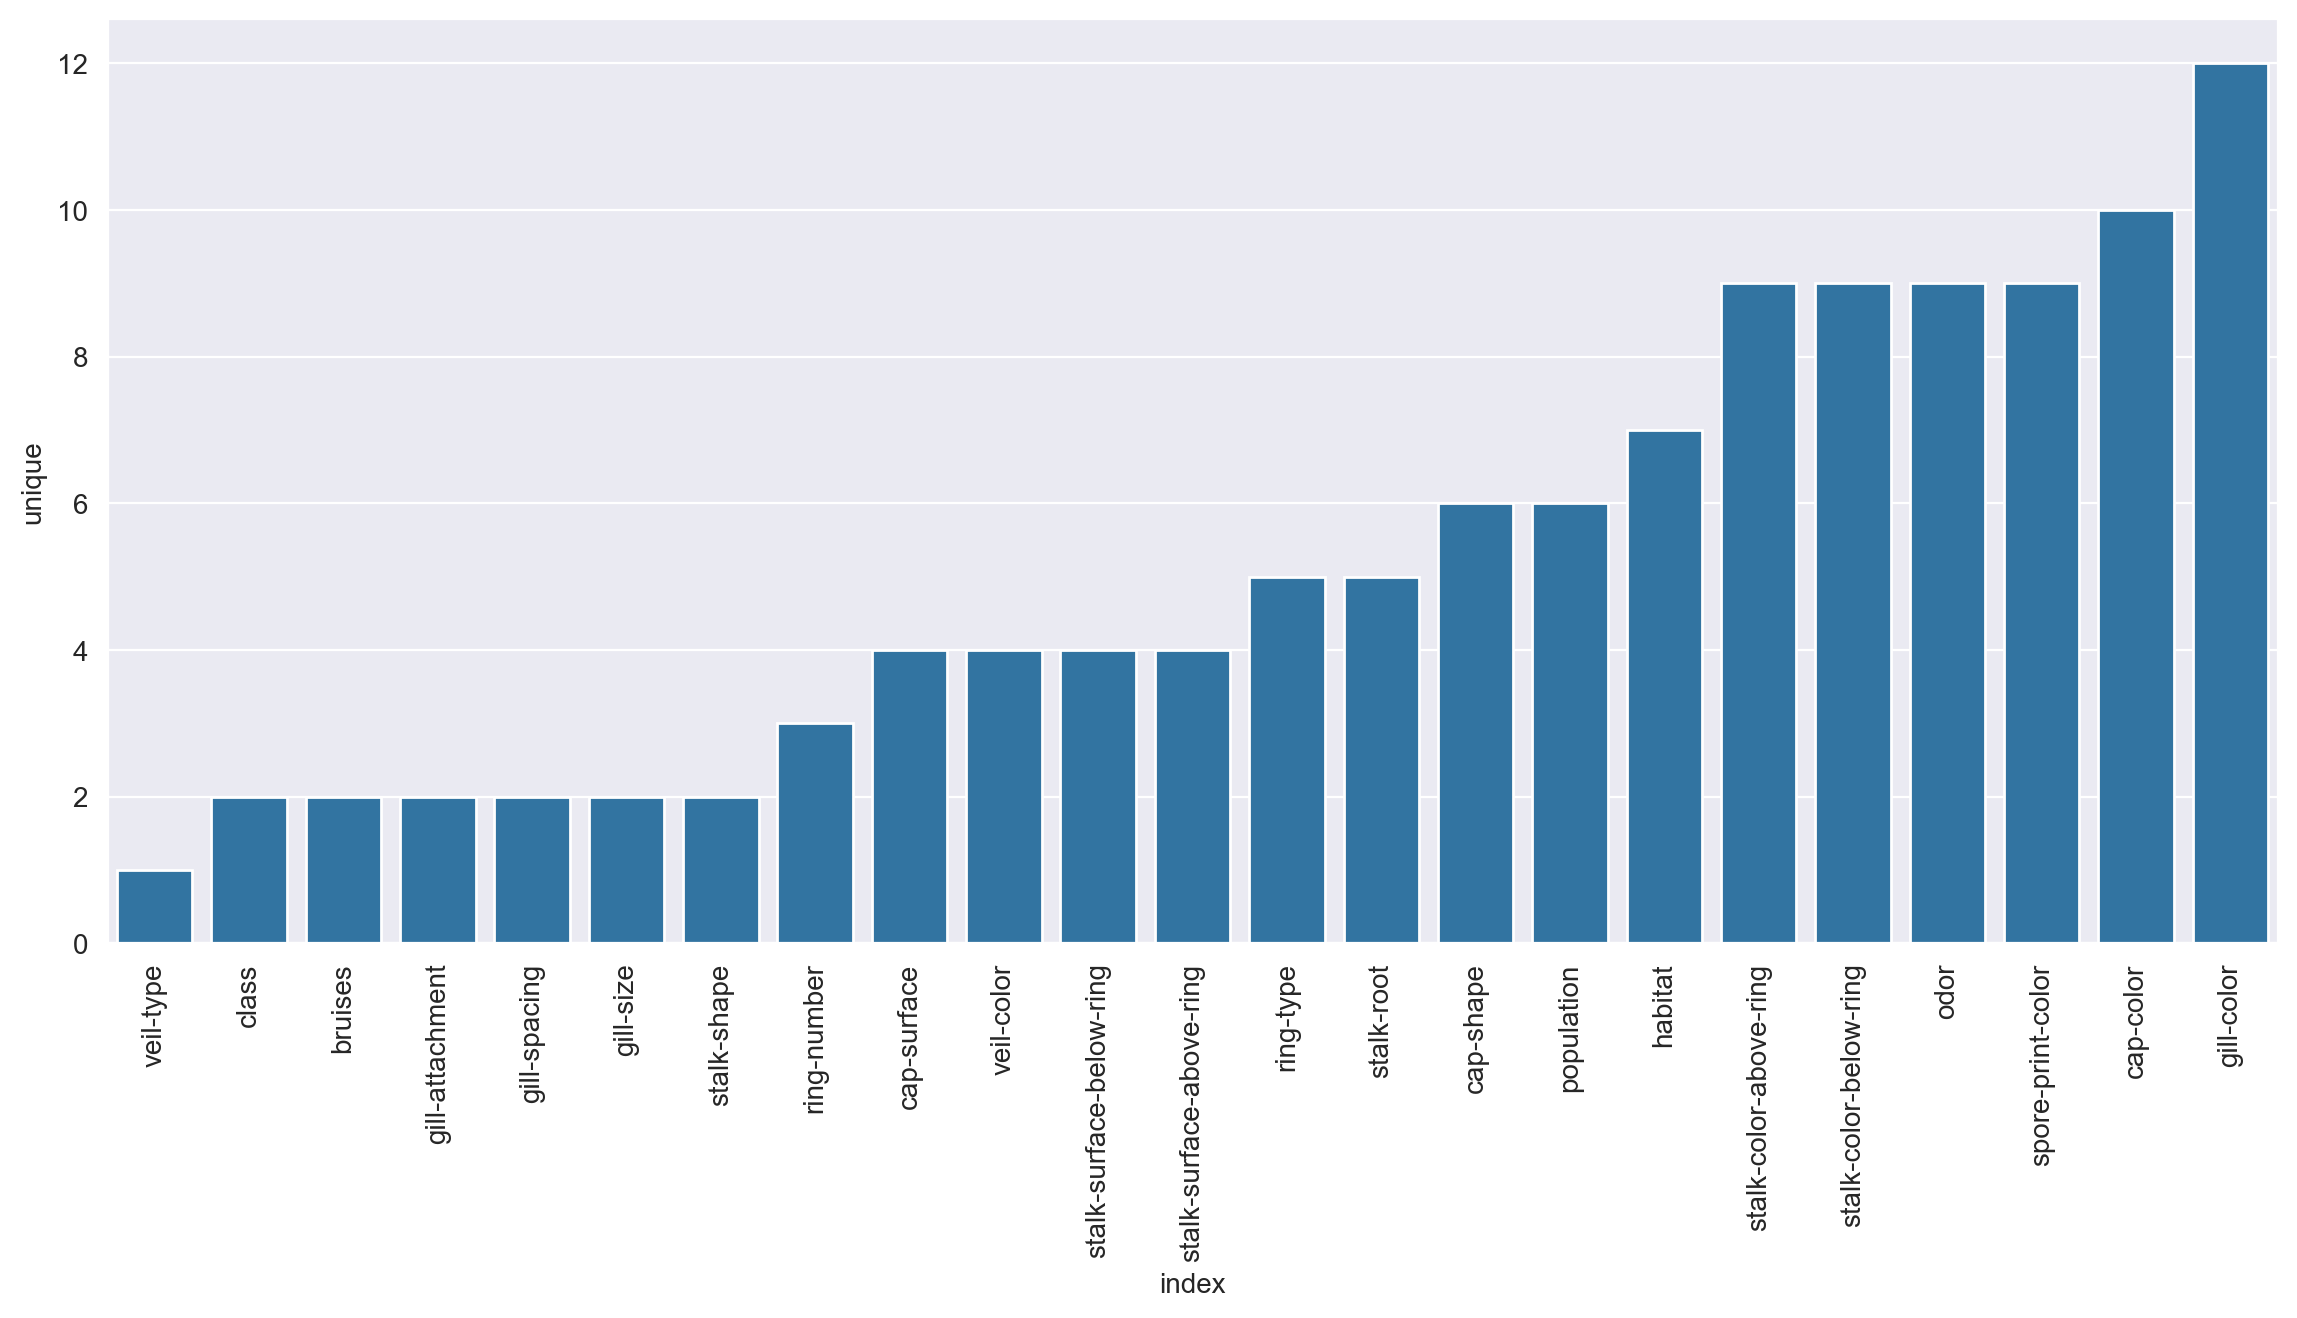

In [8]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=df.describe().transpose().reset_index().sort_values('unique'),x='index',y='unique')
plt.xticks(rotation=90);

In [11]:
X = df.drop('class', axis=1)

In [12]:
X = pd.get_dummies(X,drop_first=True)

In [13]:
y = df['class']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [16]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
model = AdaBoostClassifier(n_estimators=1, algorithm='SAMME')

In [20]:
model.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=1)

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [22]:
predictions = model.predict(X_test)

In [24]:
pd.DataFrame(classification_report(y_test, predictions, output_dict=True))

,e,p,accuracy,macro avg,weighted avg
precision,0.958333,0.811094,0.877769,0.884714,0.890210
recall,0.807634,0.959220,0.877769,0.883427,0.877769
f1-score,0.876553,0.878960,0.877769,0.877757,0.877667
support,655.000000,564.000000,0.877769,1219.000000,1219.000000


In [25]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
model.feature_importances_.argmax()

22

In [27]:
X.columns[model.feature_importances_.argmax()]

'odor_n'

In [28]:
len(X.columns)

95

In [34]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n, algorithm='SAMME')
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test, preds)
    error_rates.append(err)

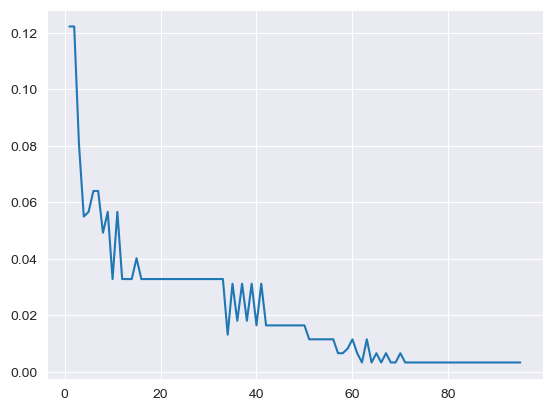

In [35]:
plt.plot(range(1,96),error_rates)

In [36]:
model

AdaBoostClassifier(algorithm='SAMME', n_estimators=95)

In [37]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08758134, 0.15483051,
       0.03297374, 0.        , 0.07596867, 0.08553577, 0.        ,
       0.        , 0.        , 0.01449336, 0.04761456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02261282, 0.        , 0.01960917, 0.        , 0.        ,
       0.04145947, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03716765, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02345876, 0.        , 0.     

In [38]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [39]:
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [40]:
imp_feats = feats[feats['Importance']>0]

In [41]:
imp_feats

,Importance
odor_c,0.087581
odor_f,0.154831
odor_l,0.032974
odor_n,0.075969
odor_p,0.085536
gill-spacing_w,0.014493
gill-size_n,0.047615
stalk-shape_t,0.022613
stalk-root_c,0.019609
stalk-surface-above-ring_k,0.041459


In [42]:
imp_feats = imp_feats.sort_values("Importance")

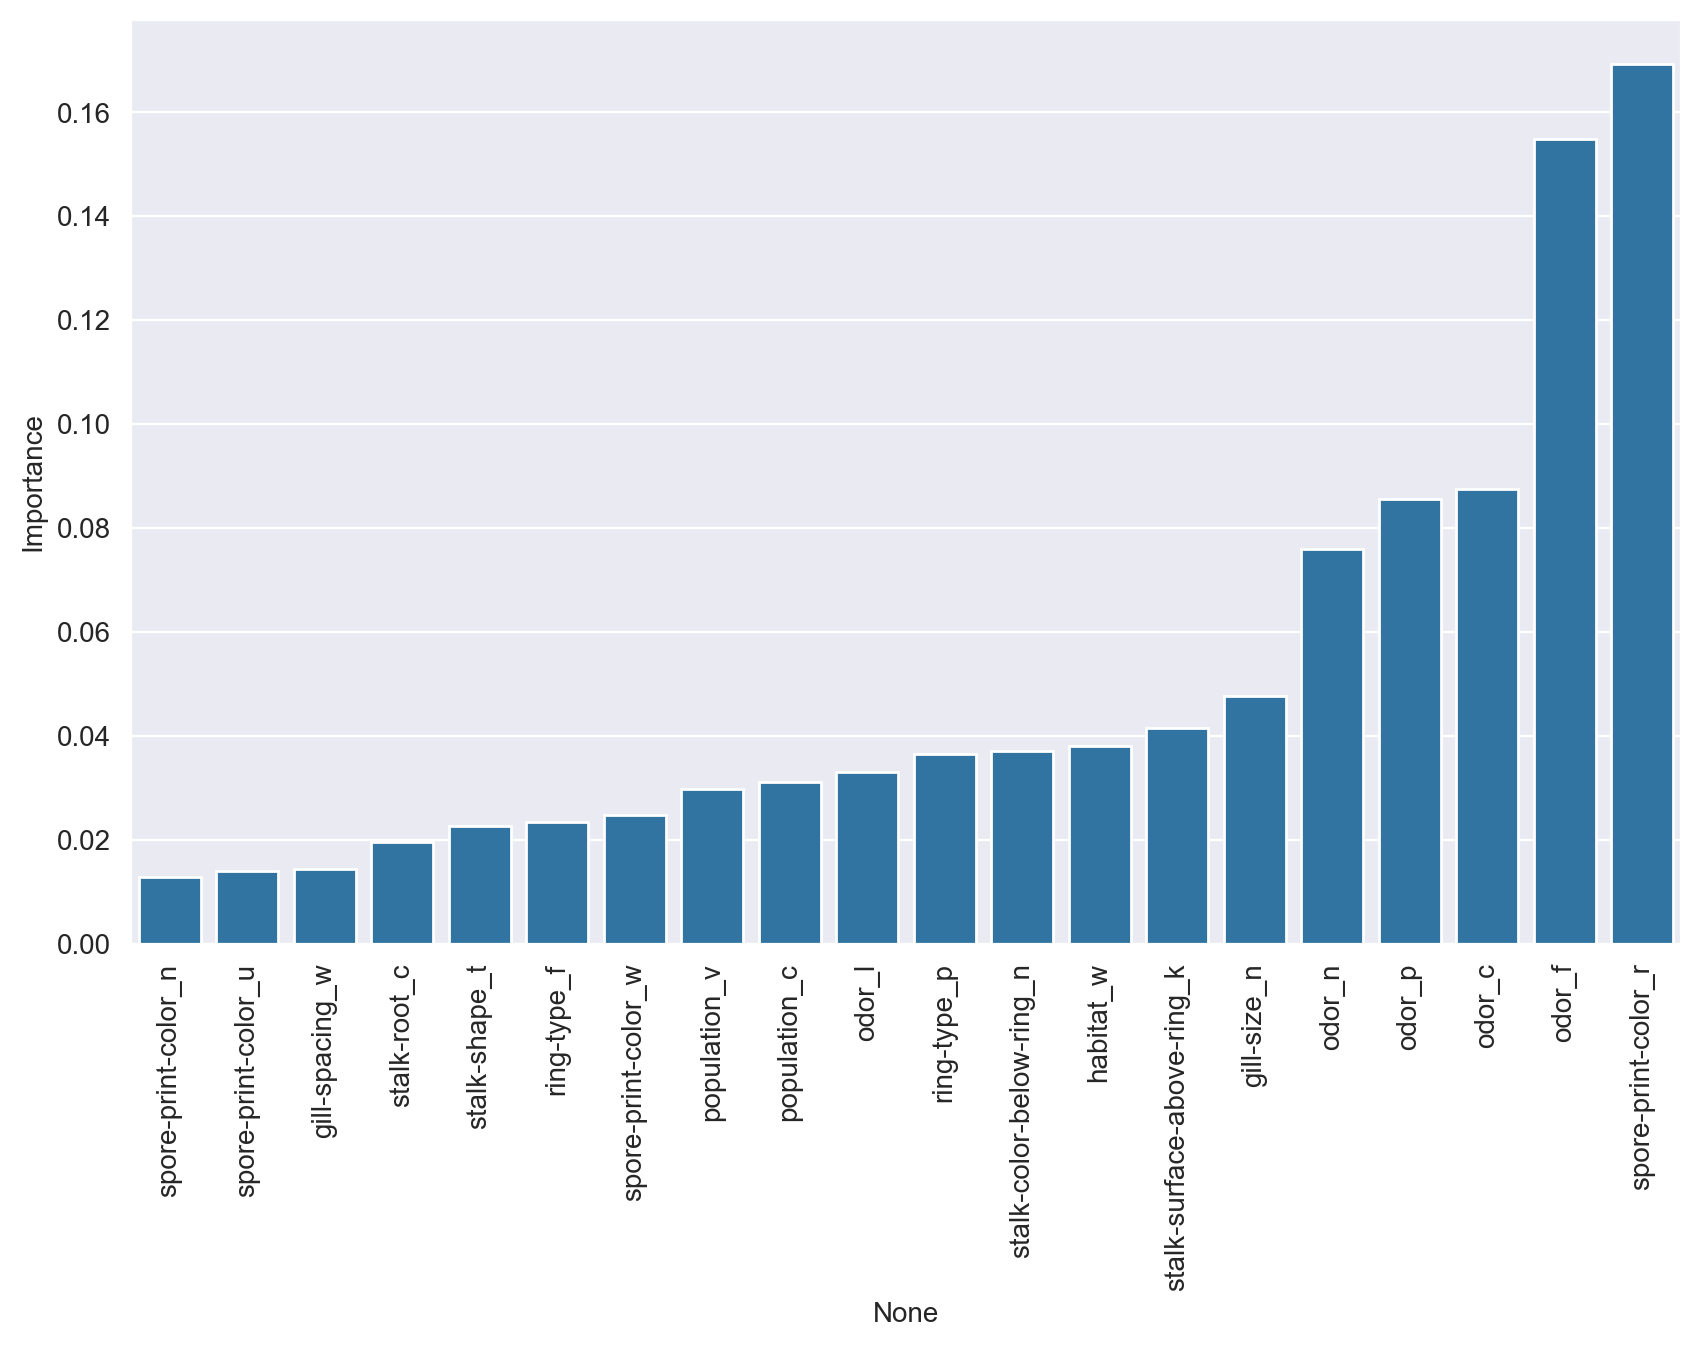

In [43]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);

<Axes: xlabel='odor', ylabel='count'>

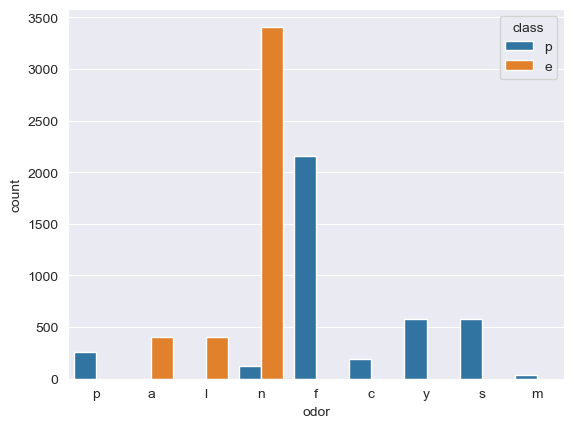

In [44]:
sns.countplot(data=df,x='odor',hue='class')